### Goldsmiths University of London
### Author....: Carlos Manuel de Oliveira Alves
### Student...: cdeol003
### Created...: 08/02/2023
### FYP............: NeuroCredit

## I. Import Libraries and Packages

In [369]:
# Importing the pandas library to read the data
import pandas as pd

# Importing the numpy library to perform numerical operations
import numpy as np

# Importing the matplotlib library to plot the data
import matplotlib.pyplot as plt

# Importing module to split the data into training and test sets
from sklearn.model_selection import train_test_split

# Importing the StandardScaler module to scale the data
from sklearn.preprocessing import StandardScaler

# Importing the Logistic Regression module
from sklearn.linear_model import LogisticRegression

# Importing the metrics module to evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Importing the RandomForestClassifier module
from sklearn.ensemble import RandomForestClassifier

# Importing the Support Vector Classifier module
from sklearn.svm import SVC

# Importing the seaborn library to plot the data
import seaborn as sns

## II. Data Inspection and Visualisation

### a. Loading the Dataset

In [370]:
# Reading the data with credit loans data
data = pd.read_csv('data.csv')

### b. Inspecting the Data Structure

In [371]:
# Printing the first 5 rows of the data
data.head().T

,0,1,2,3,4
credit_history,Good,Fair,Fair,Poor,Poor
employment_status,Unemployed,Unemployed,Unemployed,Employed,Self-Employed
collateral,None,Car,Other,Investment,Land
payment_history,Excellent,Good,Poor,Fair,Fair
type_of_credit_accounts,Auto,Mortgage,Mortgage,Student,Personal
public_records_and_collections,Judgement,Tax Lien,None,Bankruptcy,None
purpose_of_loan,Home Improvement,Other,Business,Other,Car Financing
income,11647,40599,41168,21088,48586
assets_value,36650,31948,34259,37383,18792
debt_to_income_ratio,19,22,20,11,88


In [372]:
# Print the first 5 rows of the data with the approval status approved
data[data['approval_status'] == 1].head().T

,6,20,25,53,54
credit_history,Good,Good,Good,Good,Good
employment_status,Self-Employed,Employed,Self-Employed,Self-Employed,Employed
collateral,Land,Car,Car,Car,Car
payment_history,Good,Good,Fair,Poor,Poor
type_of_credit_accounts,Other,Student,Mortgage,Auto,Personal
public_records_and_collections,Collection,None,Other,Judgement,Other
purpose_of_loan,Other,Business,Business,Home Improvement,Business
income,30482,34386,31670,32142,33362
assets_value,25357,27846,37984,46329,15882
debt_to_income_ratio,85,47,84,85,44


In [373]:
# Display concise summary of a DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   credit_history                                   1000 non-null   object
 1   employment_status                                1000 non-null   object
 2   collateral                                       1000 non-null   object
 3   payment_history                                  1000 non-null   object
 4   type_of_credit_accounts                          1000 non-null   object
 5   public_records_and_collections                   1000 non-null   object
 6   purpose_of_loan                                  1000 non-null   object
 7   income                                           1000 non-null   int64 
 8   assets_value                                     1000 non-null   int64 
 9   debt_to_income_ratio                      

### c. Convert the integer values to float values

In [374]:
# Get the list of columns with int64 data type
int_columns = data.select_dtypes(include=['int64']).columns

# Convert the int64 columns to float64 columns
data[int_columns] = data[int_columns].astype('float64')

# Display concise summary of a DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   credit_history                                   1000 non-null   object 
 1   employment_status                                1000 non-null   object 
 2   collateral                                       1000 non-null   object 
 3   payment_history                                  1000 non-null   object 
 4   type_of_credit_accounts                          1000 non-null   object 
 5   public_records_and_collections                   1000 non-null   object 
 6   purpose_of_loan                                  1000 non-null   object 
 7   income                                           1000 non-null   float64
 8   assets_value                                     1000 non-null   float64
 9   debt_to_income_ratio           

In [375]:
# Describing the dataset with the mean, standard deviation, min, max, etc.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
income,1000.0,29974.263,11484.375080,10082.0,20258.5,29904.0,39644.25,50000.0
assets_value,1000.0,29904.983,11894.798064,10037.0,19084.0,29880.5,40456.00,49999.0
debt_to_income_ratio,1000.0,50.131,29.148645,0.0,25.0,50.0,75.00,100.0
length_of_credit_history,1000.0,50.014,28.757065,0.0,25.0,50.0,75.00,100.0
number_of_credit_inquiries,1000.0,2.417,1.670300,0.0,1.0,2.0,4.00,5.0
number_of_credit_accounts,1000.0,2.618,1.687876,0.0,1.0,3.0,4.00,5.0
number_of_credit_accounts_opened_last_12_months,1000.0,2.491,1.702003,0.0,1.0,2.0,4.00,5.0
current_balance_of_credit_accounts,1000.0,9719.805,5715.759175,3.0,4792.5,9489.0,14889.75,19962.0
total_credit_limit,1000.0,9774.981,5790.397826,42.0,4713.5,9672.0,14951.50,19996.0
total_credit_utilization,1000.0,50.323,28.545359,0.0,25.0,50.0,75.00,100.0


### d. Visualising the Dataset

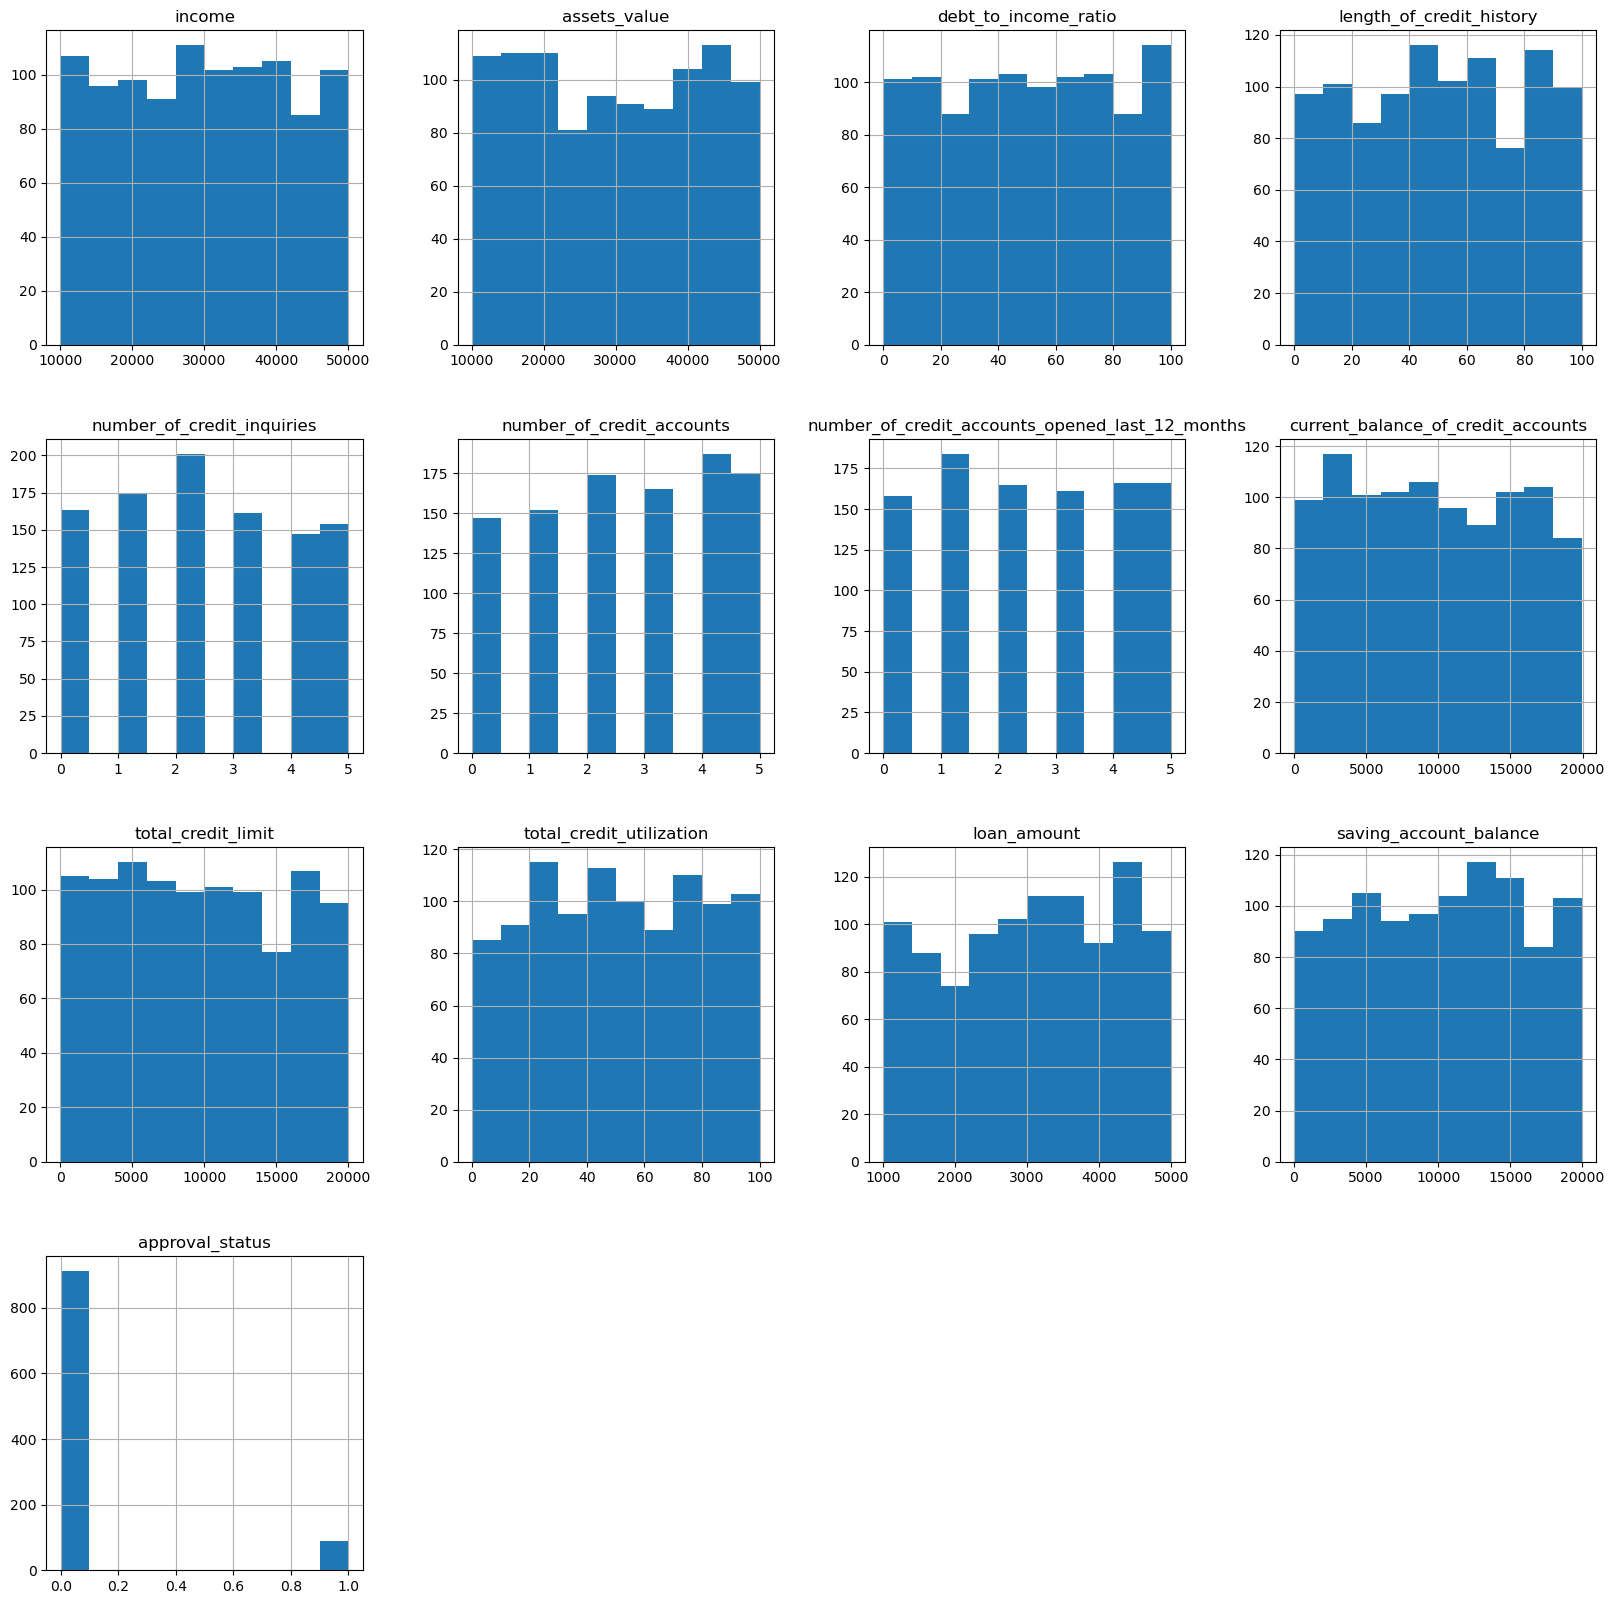

In [376]:
# Plotting the histogram of the data
data.hist(figsize=(20,20))
plt.show()

## III. Data Pre-Processing

### a. Check for Missing Values on the dataset

In [377]:
# Print the missing values in the dataset
data.isnull().sum()

credit_history                                     0
employment_status                                  0
collateral                                         0
payment_history                                    0
type_of_credit_accounts                            0
public_records_and_collections                     0
purpose_of_loan                                    0
income                                             0
assets_value                                       0
debt_to_income_ratio                               0
length_of_credit_history                           0
number_of_credit_inquiries                         0
number_of_credit_accounts                          0
number_of_credit_accounts_opened_last_12_months    0
current_balance_of_credit_accounts                 0
total_credit_limit                                 0
total_credit_utilization                           0
loan_amount                                        0
saving_account_balance                        

### b. Looking for Correlations

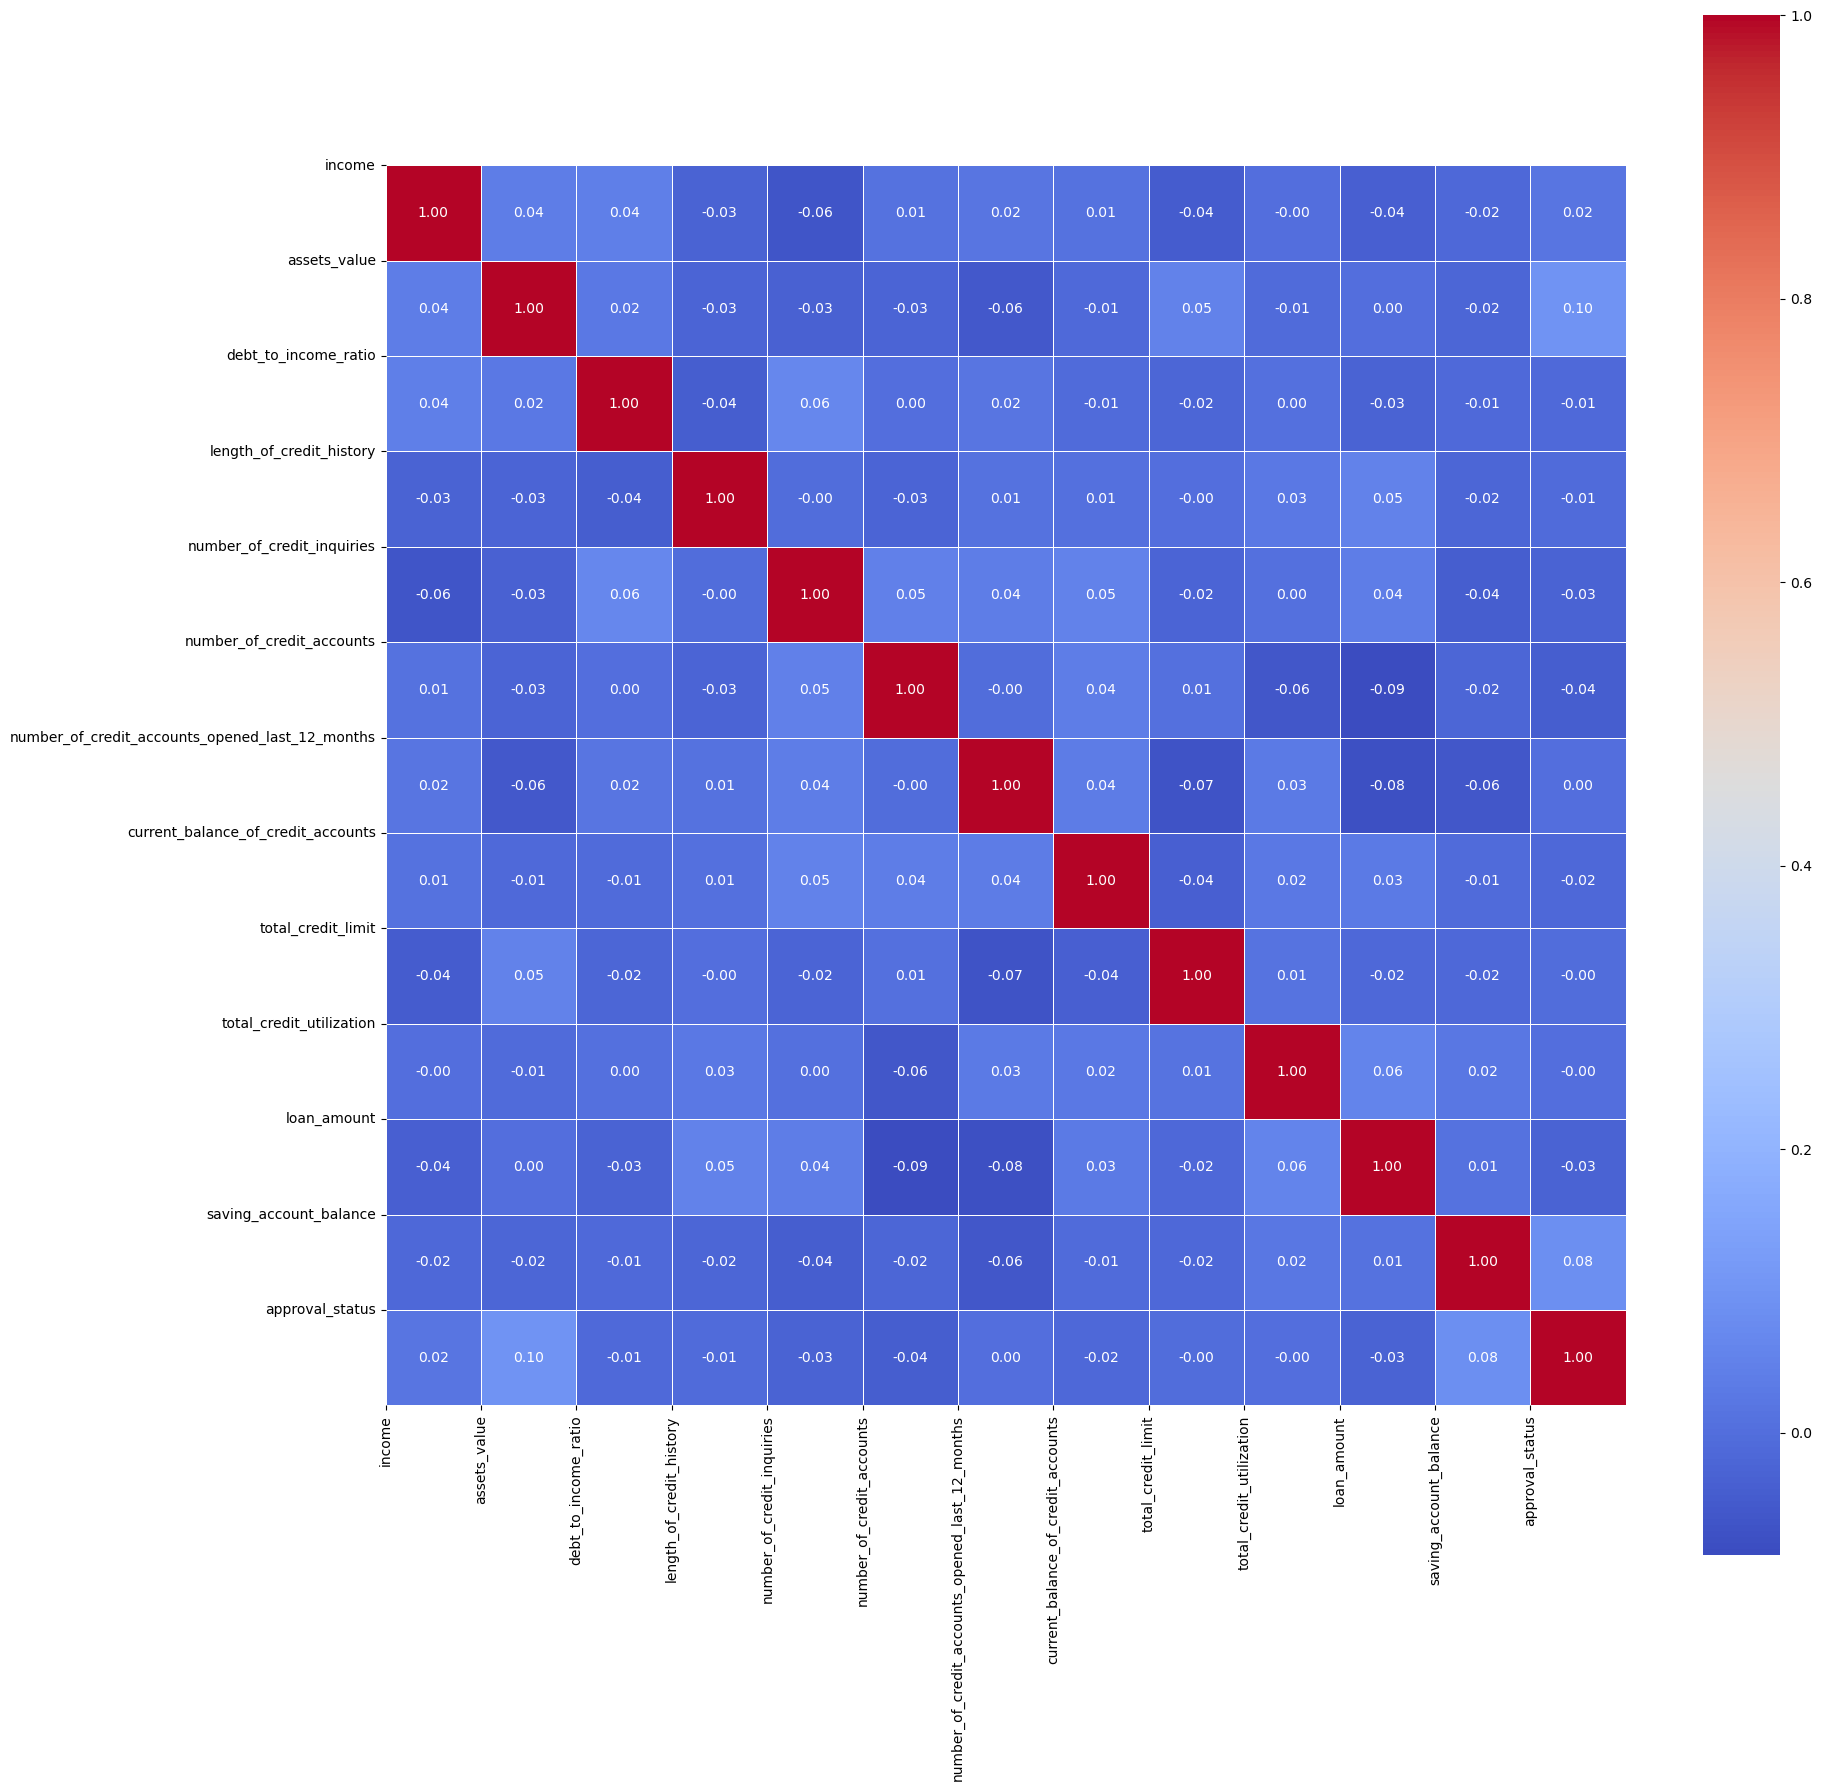

In [378]:
# Create a correlation matrix of the dataset
corr = data.corr()

# Plot the correlation matrix of the dataset
plt.figure(figsize=(20, 20))

# Using Seaborn's heatmap for a better visualization
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)

# Set the x and y-axis labels
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

# Display the plot
plt.show()

In [379]:
# Print the correlation matrix of the dataset
corr['income'].sort_values(ascending=False)


income                                             1.000000
debt_to_income_ratio                               0.043837
assets_value                                       0.040643
number_of_credit_accounts_opened_last_12_months    0.016279
approval_status                                    0.015341
number_of_credit_accounts                          0.009425
current_balance_of_credit_accounts                 0.009141
total_credit_utilization                          -0.000040
saving_account_balance                            -0.015297
length_of_credit_history                          -0.029184
loan_amount                                       -0.038877
total_credit_limit                                -0.044986
number_of_credit_inquiries                        -0.061352
Name: income, dtype: float64

### c. Looking at the correlation matrix, income and debt_to_income_ratio are highly correlated

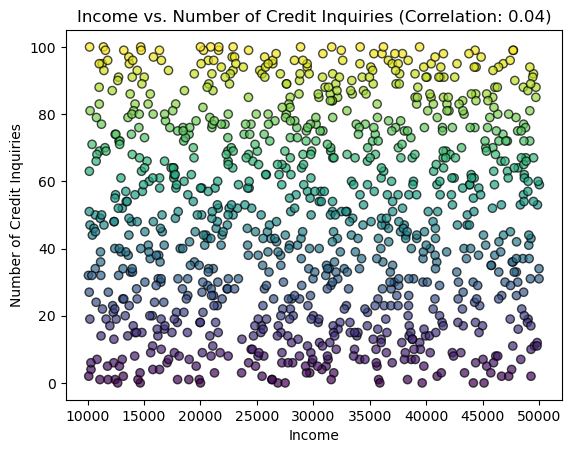

In [380]:
# Extract the correlation value between 'income' and 'debt_to_income_ratio'
correlation_value = corr.loc['income', 'debt_to_income_ratio']

# Create the scatter plot
plt.scatter(data['income'], data['debt_to_income_ratio'], c=data['debt_to_income_ratio'], cmap='viridis', alpha=0.7, edgecolors='k')

# Set the title, x-axis label, and y-axis label
plt.title(f"Income vs. Number of Credit Inquiries (Correlation: {correlation_value:.2f})")
plt.xlabel('Income')
plt.ylabel('Number of Credit Inquiries')

# Display the plot
plt.show()


### d. Prepare the dataset

In [381]:
# Create a new dataframe with the columns that are highly correlated with the income
data_new = data[['income',
                'debt_to_income_ratio',
                'assets_value',
                'number_of_credit_accounts_opened_last_12_months',
                'approval_status']]

# Print the first 5 rows of the new dataframe
data_new.head().T

,0,1,2,3,4
income,11647.0,40599.0,41168.0,21088.0,48586.0
debt_to_income_ratio,19.0,22.0,20.0,11.0,88.0
assets_value,36650.0,31948.0,34259.0,37383.0,18792.0
number_of_credit_accounts_opened_last_12_months,1.0,0.0,4.0,1.0,3.0
approval_status,0.0,0.0,0.0,0.0,0.0


In [382]:
# Print the first 5 rows of the new dataframe with the approval status approved
data_new[data_new['approval_status'] == 1].head().T

,6,20,25,53,54
income,30482.0,34386.0,31670.0,32142.0,33362.0
debt_to_income_ratio,85.0,47.0,84.0,85.0,44.0
assets_value,25357.0,27846.0,37984.0,46329.0,15882.0
number_of_credit_accounts_opened_last_12_months,3.0,5.0,0.0,0.0,4.0
approval_status,1.0,1.0,1.0,1.0,1.0


### e. Select features and target

In [383]:
# Store the features in the X variable and the target in the y variable
X = data_new.drop('approval_status', axis=1)
y = data_new['approval_status']


### f. Standardize the features

In [384]:
# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform the features
X_scaled = scaler.fit_transform(X)


### g. Split the dataset into train and test sets

In [385]:
# Create the X_train, X_test, y_train, y_test variables by splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## IV. Models Training and Optimisation

### a. Logistic Regression Classifier

In [386]:
# Create an instance of the Logistic Regression
log_reg = LogisticRegression()

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Predict the target on the test data
y_pred_log = log_reg.predict(X_test)

### b. Random Forest Classifier

In [387]:
# Create a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_clf.fit(X_train, y_train)

# Predict the target on the test data
y_pred_rf = rf_clf.predict(X_test)


### c. Support Vector Machine (SVM) Classifier

In [388]:
# Create an instance of the Support Vector Classifier
svc_clf = SVC(kernel='linear', C=1, random_state=42)

# Train the model on the training data
svc_clf.fit(X_train, y_train)

# Predict the target on the test data
y_pred_svc = svc_clf.predict(X_test)

## V. Make Predictions and Evaluate the Model

### a. Logistic Regression

In [389]:
# Predict the target on the test data
y_pred = log_reg.predict(X_test)

# Calculate the accuracy of the model: accuracy, confusion matrix, classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the accuracy, confusion matrix, and classification report
print('\nAccuracy: {:.2f} %'.format(accuracy * 100))
print('\nConfusion Matrix: \n', conf_matrix)
print('\n>> Classification Report\n', class_report)



Accuracy: 90.00 %

Confusion Matrix: 
 [[180   0]
 [ 20   0]]

>> Classification Report
               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       180
         1.0       0.00      0.00      0.00        20

    accuracy                           0.90       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.81      0.90      0.85       200



c:\Users\Carlos Alves\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Carlos Alves\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Carlos Alves\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### b. Random Forest Classifier

In [390]:
# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Calculate the accuracy of the model: accuracy, confusion matrix, classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the accuracy, confusion matrix, and classification report
print('\nAccuracy: {:.2f} %'.format(accuracy * 100))
print('\nConfusion Matrix: \n', conf_matrix)
print('\n>> Classification Report\n', class_report)



Accuracy: 90.00 %

Confusion Matrix: 
 [[180   0]
 [ 20   0]]

>> Classification Report
               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       180
         1.0       0.00      0.00      0.00        20

    accuracy                           0.90       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.81      0.90      0.85       200



c:\Users\Carlos Alves\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Carlos Alves\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Carlos Alves\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### c. Support Vector Machine (SVM) Classifier

In [391]:
# Make predictions on the test data
y_pred_svc = svc_clf.predict(X_test)

# Calculate the accuracy of the model: accuracy, confusion matrix, classification report
accuracy = accuracy_score(y_test, y_pred_svc)
conf_matrix = confusion_matrix(y_test, y_pred_svc)
class_report = classification_report(y_test, y_pred_svc)

# Print the accuracy, confusion matrix, and classification report
print("SVM Accuracy: {:.2f} %".format(accuracy * 100))
print('\nConfusion Matrix: \n', conf_matrix)
print('\n>> Classification Report\n', class_report)


SVM Accuracy: 90.00 %

Confusion Matrix: 
 [[180   0]
 [ 20   0]]

>> Classification Report
               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       180
         1.0       0.00      0.00      0.00        20

    accuracy                           0.90       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.81      0.90      0.85       200



c:\Users\Carlos Alves\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Carlos Alves\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Carlos Alves\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### d. Evaluate all Models

c:\Users\Carlos Alves\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Carlos Alves\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Carlos Alves\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Carlos Alves\anaconda3\li

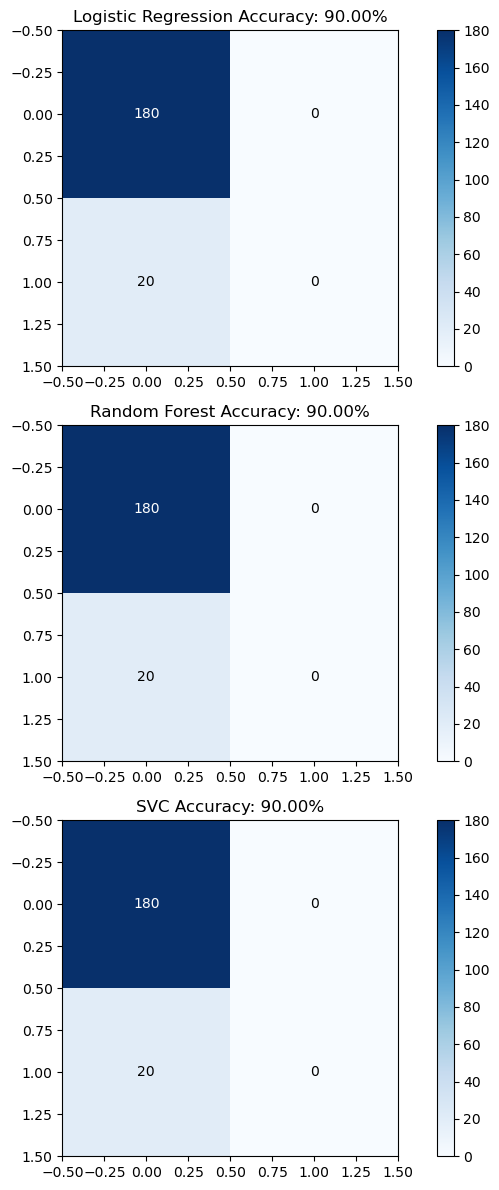

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       180
         1.0       0.00      0.00      0.00        20

    accuracy                           0.90       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.81      0.90      0.85       200


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       180
         1.0       0.00      0.00      0.00        20

    accuracy                           0.90       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.81      0.90      0.85       200


SVC Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       180
         1.0       0.00      0.00      0.00        20

    accuracy                           0.90       200
   macro avg       

c:\Users\Carlos Alves\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Carlos Alves\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Carlos Alves\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Carlos Alves\anaconda3\li

In [392]:
# Store the predictions of the models in a dictionary
models = {'Logistic Regression': y_pred_log, 'Random Forest': y_pred_rf, 'SVC': y_pred_svc}

# Create a figure and axes
fig, axes = plt.subplots(nrows=len(models), ncols=1, figsize=(8, len(models) * 4))

# For each model, calculate the accuracy, confusion matrix, and classification report
for ax, (name, y_pred) in zip(axes, models.items()):

    # Calculate the accuracy of the model: accuracy, confusion matrix, classification report
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)

    # Set the title of the axes to the model name and the accuracy
    im = ax.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set_title(f"{name} Accuracy: {accuracy * 100:.2f}%")

    # Plot the confusion matrix
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j, i, format(conf_matrix[i, j], "d"),
                    ha="center", va="center",
                    color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

# Adjust the subplot layout and show the plot
plt.tight_layout()
plt.show()

# For each model, calculate classification report
for name, y_pred in models.items():

    # Calculate the classification report
    class_report = classification_report(y_test, y_pred)

    # Print the classification report
    print(f"{name} Classification Report:\n{class_report}\n")